In [1]:
import pandas as pd
import numpy as np
from math import e
import random

In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [3]:
iris_data = pd.read_csv('IRIS.csv')

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#find number of class in target column (species)
iris_data['species'].nunique()

3

In [8]:
#check number of data in each class
iris_data['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [9]:
#check missing value
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Figure size 1440x1440 with 0 Axes>

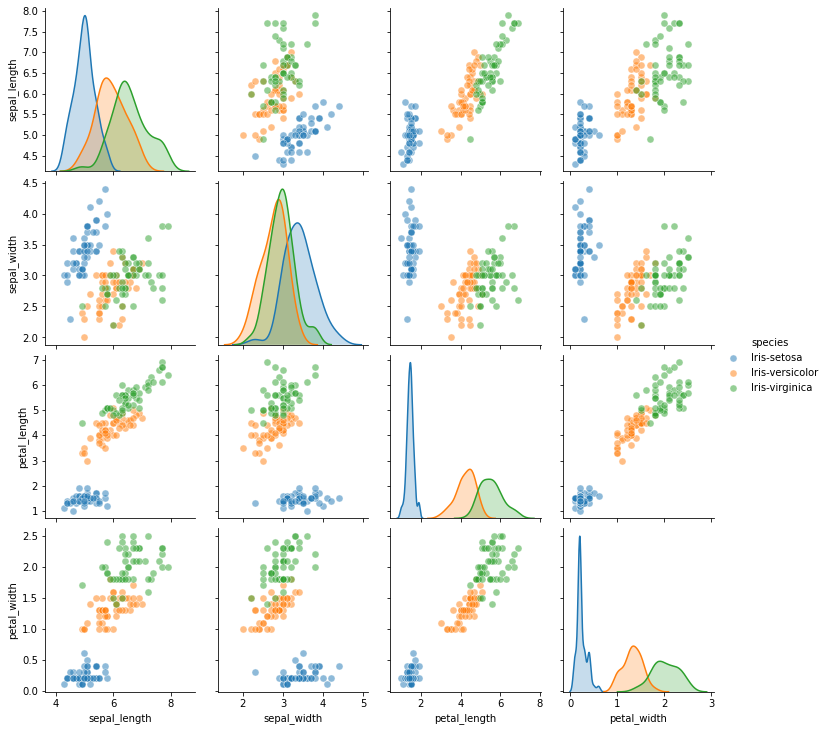

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.pairplot(iris_data,hue="species", markers="o",plot_kws={"s": 50,'alpha':0.5})

# 1. Prepare the data in one-against-the-rest strategy. This can be done by converting the "Species" column into 3 binary columns. 

In [11]:
# encode=preprocessing.LabelEncoder()
# target_encode = encode.fit_transform(iris_data['species'])
# target_encode= pd.DataFrame(target_encode)
# target_encode
target = pd.get_dummies(iris_data['species'])
target

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [88]:
# Feature& Target  Dataset
features = iris_data.iloc[:,0:4].copy()
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
X = features
y = target
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [92]:
X.shape

(150, 4)

In [93]:
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (150, 4)
Shape of y :  (150, 3)


# 2. Formulate the error function of the logistic regression with ridge regularization criterion

In [23]:
# Define Logistic Regression hypothesis or sigmoid function
def sigmoid(feature,weight):
    z= feature@weight
    sig = 1/(1+np.exp(-z))
    return sig

In [24]:
def cost(feature,target,weight):
    m = feature.shape[0] #total number of sample
    h = sigmoid(feature,weight)
    cost_function = (-1/m)*np.sum(target*np.log(h)+(1-target)*np.log(1-h))
    return cost_function

In [25]:
def cost_L2(feature, target, weight, theta):
    cost_L2 = cost(feature,target,weight)+theta*np.dot(weight.T,weight)
    return cost_L2

# 3. Derive the gradient of the error function by deriving the partial derivative of the error function in Task 2.

In [27]:
def my_gradient(feature,weight,target,theta):
    n=features.shape[0]
    h=sigmoid(feature,weight)
    gradient = (1/n)*(feature.transpose()@(h-target))
    derive = 2*theta*np.sum(weight)
    grad = gradient+derive
    return grad

In [28]:
#test my_gradient fuction
weight = np.random.randn(X.shape[1])
my_gradient(X.to_numpy(),weight,y.iloc[:,0].to_numpy(),0.1)

array([-1.50952136, -1.0553565 , -0.39160082, -0.0541606 ])

# 4. Implement the gradient descent using all of the dataset in each iteration

In [32]:
# random 20 sample
def sample(X, y, n_sample=20):
    m=X.shape[0]
    idx_sample = np.random.randint(150,size=n_sample)
    return X.iloc[idx_sample], y.iloc[idx_sample,:]

In [33]:
#test sample function
X_sample, y_sample =sample(X, y, n_sample=len(X))
print("X_sample",X_sample.shape)
print("y_sample",y_sample.shape)

X_sample (150, 4)
y_sample (150, 3)


In [34]:
def only_finalcost(my_list):
    l=[]
    for sub in my_list:
#     print(sub)
         l.append(sub[-1])
#         print(sub[-1])
    return l

In [36]:
def implement_GD(X,y,learning_rate,theta,n_iter,n_sample): 
    X_sample, y_sample = sample(X, y,n_sample=n_sample) # use all of sample in each iteration
    print("To run this fucntion I use :", len(X_sample),"row from 150 row.")
    
    
    all_cost =[]
    final_weight = []
    n_data=len(X_sample)

    for y_class in range(3): #3 is number of target class
        cost=[]
        weight = np.random.randn(X_train.shape[1])
        for i in range(n_iter):
            GD=my_gradient(X_sample.to_numpy(),weight,y_sample.iloc[:,y_class].to_numpy(),theta)
            weight = weight-learning_rate*GD
            
            cost_withL2=cost_L2(X_sample.to_numpy(),y_sample.iloc[:,y_class].to_numpy(),weight,theta)
            cost.append(cost_withL2)
        all_cost.append(cost)
        final_weight.append(weight)
        final_cost = only_finalcost(all_cost)
    return final_weight,final_cost,all_cost,n_data

In [37]:
#transform dataframe to numpy
def data_np(X,y):
    X_np=X.to_numpy()
    y_np=y.to_numpy()
    if X.shape[0] != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    return X_np,y_np

In [38]:
#test data_np fucntion
# data_np(X,y)

In [39]:
def prediction(X,y,final_weight,n_data):
    X,y=data_np(X,y)
    correct=0
    all_data = len(X)
    for col in range(3): #3 is number of target class
        best_weight = final_weight[col]
        y_hat=sigmoid(X,best_weight)
#         print(y_hat)
        
        for row in range(150): #150 is total number of row 
            y_real = y[row][col]
            ans=y_hat[row]
            
            if y_real==1:
                if ans>= 0.5:
                    correct += 1
        accuracy=correct/all_data
    print("From using :"+ str(n_data) +"from 150 row, \n we got accuracy=",accuracy)
    return accuracy

In [40]:
 final_weight,final_cost,all_cost,n_data=implement_GD(X,y,0.01,0.01,100,150)

To run this fucntion I use : 150 row from 150 row.


In [41]:
prediction(X,y,final_weight,n_data)

From using :150from 150 row, 
 we got accuracy= 0.5266666666666666


0.5266666666666666

# 5.  Implement the stochastic gradient descent using the subset of dataset in each iteration.

In [45]:
#defind a third part of dataset
sub_sample=int(len(X)/3)
sub_sample

50

In [47]:
 final_weight,final_cost,all_cost,n_data=implement_GD(X,y,0.01,0.01,100,sub_sample)

To run this fucntion I use : 50 row from 150 row.


In [48]:
prediction(X,y,final_weight,n_data)

From using :50from 150 row, 
 we got accuracy= 0.32


0.32

# 6. Test to see the effect of l on the training process.


In [49]:
acc_list=[]
def theta_hyperparam(X,y):
    theta_list = [0.0001,0.001,0.01,0.1,1,10]
    for i in theta_list:
        final_weight,final_cost,all_cost,n_data=implement_GD(X,y,i,0.01,100,150)
        acc=prediction(X,y,final_weight,n_data)
        acc_list.append(acc)
    return acc_list

In [50]:
acc_list = theta_hyperparam(X,y)

To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.3333333333333333
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.7533333333333333
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.32666666666666666
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.6666666666666666
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.6666666666666666
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.6666666666666666


<ipython-input-24-665148d8a22d>:4: RuntimeWarning: divide by zero encountered in log
  cost_function = (-1/m)*np.sum(target*np.log(h)+(1-target)*np.log(1-h))
<ipython-input-24-665148d8a22d>:4: RuntimeWarning: invalid value encountered in multiply
  cost_function = (-1/m)*np.sum(target*np.log(h)+(1-target)*np.log(1-h))


In [51]:
acc_list

[0.3333333333333333,
 0.7533333333333333,
 0.32666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

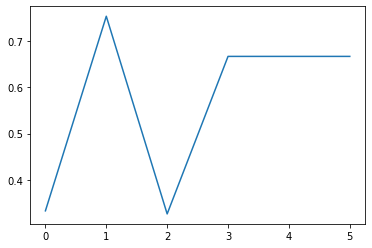

In [70]:
plt.plot(acc_list)

from theta_list = [0.0001,0.001,0.01,0.1,1,10] 
### >The accuracy plot has shown that the best lambda is 0.001

# 7.Test to see the effect of sampling proportion in Task 5.

In [71]:
n_sample = [30,60,90,120,150]

In [81]:
acc_list=[]
def Nsample_tuning(X,y):
    n_sample_list = [30,60,90,120,150]
    for i in n_sample_list:
        final_weight,final_cost,all_cost,n_data=implement_GD(X,y,0.001,0.01,100,i)
        acc=prediction(X,y,final_weight,n_data)
        acc_list.append(acc)
    return acc_list

In [82]:
acc_list = Nsample_tuning(X,y)
acc_list

To run this fucntion I use : 30 row from 150 row.
From using :30from 150 row, 
 we got accuracy= 0.3466666666666667
To run this fucntion I use : 60 row from 150 row.
From using :60from 150 row, 
 we got accuracy= 0.6
To run this fucntion I use : 90 row from 150 row.
From using :90from 150 row, 
 we got accuracy= 0.6666666666666666
To run this fucntion I use : 120 row from 150 row.
From using :120from 150 row, 
 we got accuracy= 0.6266666666666667
To run this fucntion I use : 150 row from 150 row.
From using :150from 150 row, 
 we got accuracy= 0.7333333333333333


[0.3466666666666667,
 0.6,
 0.6666666666666666,
 0.6266666666666667,
 0.7333333333333333]

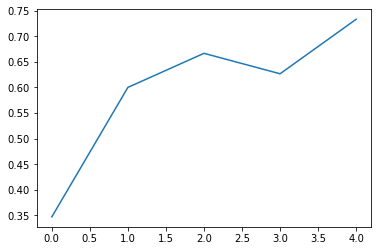

In [87]:
plt.plot(acc_list)

from n_sample = [30,60,90,120,150]
### > The accuracy plot has shown that using all of the datasets gave the highest accuracy.
###  > In the case of using subset data, 3/5 of all data set also gave the hight accuracy more than other proportion.